# Klasyfikacja zdjęć

[source](https://www.tensorflow.org/tutorials/keras/classification)

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


## Wczytywanie zbioru danych MNIST

Dataset: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 

Dataset zawiera 70k ograzków w skali szarości sklasyfikowanych w 10 kategori. 

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:
Wczytaniy dataset zwróci 4 tablice NumPy:

* `train_images` i `train_labels` - *training set*
* `test_images` i `test_labels` -*test set*

Tablice: 28x28, wartości od 0 do 255 (pixele).

*labels* - wartości od 0 do 9, które reprezentują:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Eksploracja danych

Rozmiar całego zbioru treningowego

In [4]:
train_images.shape

(60000, 28, 28)

Wielkość *labeli* zbioru treningowego

In [5]:
len(train_labels)

60000

Wartości są z przedziału od 0 do 9

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Podobnie dla zbioru testowego

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

## Przygotowanie danych:

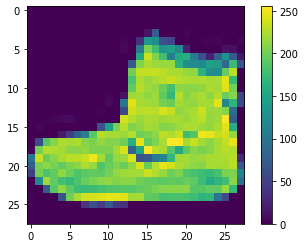

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Wartości pikseli są pomiędzy 0 a 255. Dla lepszego efektu uczenia zminiejszmy zakres danych od przedziąłu [0, 1].

W tym przypadku podzielmy wartości przez `255`.

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Wyświetlmy kilka pierwszysch wartości wraz z odpowiadojącymi wartościami:

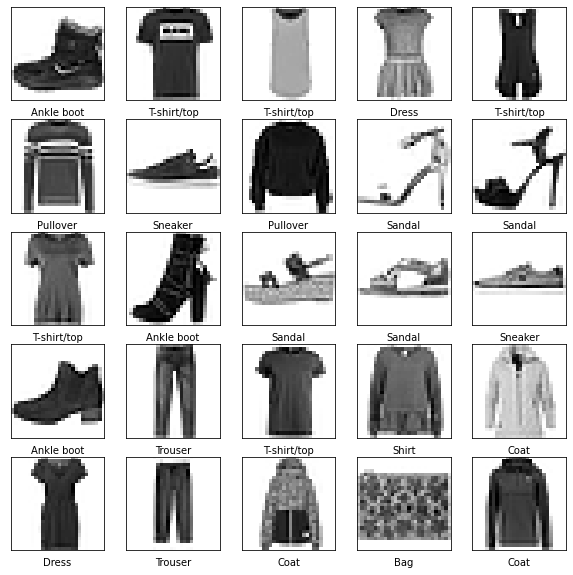

In [12]:
plt.figure(figsize=(10,10))
nrows = 5
ncols = 5
for i in range(nrows * ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Budowanie modelu

Budowanie sieci neuronowej wymaga konfiguracji architektury sieci a następnie kompilacji.

### Set up the layers

[*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers) - dokumentcja

Będziemy korzystać z warstwy `Dense` - czyli *każdy z każdym* - **fully connected layer**

```Python
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Pierwsza warstwa to `tf.keras.layers.Flatten` - jest to warstwa, który *wypłaszcza* nam nasze dane, tzn. z macierzy 2D 28 na 28 robie wektor 1D o długości 784 (28 * 28), podobnie jak funkcja `np.ndarray.flatten` z biblioteki NumPy zastosowana dl każdego obrazka. Warstwa `Flatten` nie jest warstwą, która się uczy, jej zadaniem jest tylko i wyłacznie przprocesowanie danch!

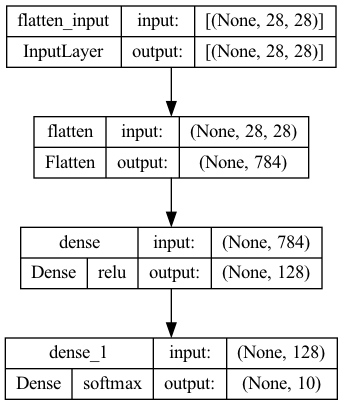

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

### Compile the model

Teraz musimy [*zcompilować*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) model:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) 
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) 
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model (Forward propagation)

[model.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)

In [16]:
%%time
model.fit(train_images, train_labels, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
  1/480 [..............................] - ETA: 1:07 - loss: 2.5455 - accuracy: 0.0900

2022-11-17 19:06:26.988308: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


480/480 [==============================] - 1s 1ms/step - loss: 0.5617 - accuracy: 0.8062 - val_loss: 0.4322 - val_accuracy: 0.8516
Epoch 2/10
480/480 [==============================] - 0s 894us/step - loss: 0.4097 - accuracy: 0.8544 - val_loss: 0.4065 - val_accuracy: 0.8562
Epoch 3/10
480/480 [==============================] - 0s 928us/step - loss: 0.3701 - accuracy: 0.8683 - val_loss: 0.3682 - val_accuracy: 0.8653
Epoch 4/10
480/480 [==============================] - 0s 913us/step - loss: 0.3406 - accuracy: 0.8776 - val_loss: 0.3602 - val_accuracy: 0.8716
Epoch 5/10
480/480 [==============================] - 0s 980us/step - loss: 0.3196 - accuracy: 0.8835 - val_loss: 0.3507 - val_accuracy: 0.8747
Epoch 6/10
480/480 [==============================] - 0s 900us/step - loss: 0.3031 - accuracy: 0.8903 - val_loss: 0.3396 - val_accuracy: 0.8808
Epoch 7/10
480/480 [==============================] - 0s 918us/step - loss: 0.2949 - accuracy: 0.8934 - val_loss: 0.3299 - val_accuracy: 0.8806
Epoch

### Evaluation

In [17]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2, batch_size=100)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2, batch_size=100)

print('\nTrain accuracy:', train_loss)
print('\nTest accuracy:', test_acc)

600/600 - 0s - loss: 0.2680 - accuracy: 0.9018 - 260ms/epoch - 434us/step
100/100 - 0s - loss: 0.3586 - accuracy: 0.8687 - 48ms/epoch - 481us/step

Train accuracy: 0.2680128514766693

Test accuracy: 0.8687000274658203


Róznica pomiędzy dokładnoćią dla zbioru testowego i treningowego jiest *miarą* przetrenowania (overfitting).

*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Predykcje

In [18]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 332us/step


Model zwrócił predykcję dla każdego z przykładu.

In [19]:
predictions[0]

array([4.7027717e-07, 1.6996808e-07, 3.7871191e-06, 5.8634930e-07,
       1.4040333e-05, 5.5505815e-03, 1.6085289e-05, 4.6889164e-02,
       3.6130310e-05, 9.4748896e-01], dtype=float32)

Wyjściem z sieci neuronowej jest warstwa z funkcją aktywacji `softmax`, która zwraca nam prawdopodobieństwo przynależności do każdej z klasy, stąd dla jednego przykłądu mamy aż 10 pozycji.

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Wizualizacja predykcji

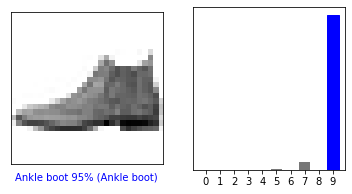

In [25]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

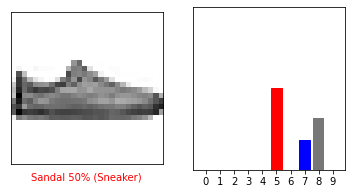

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

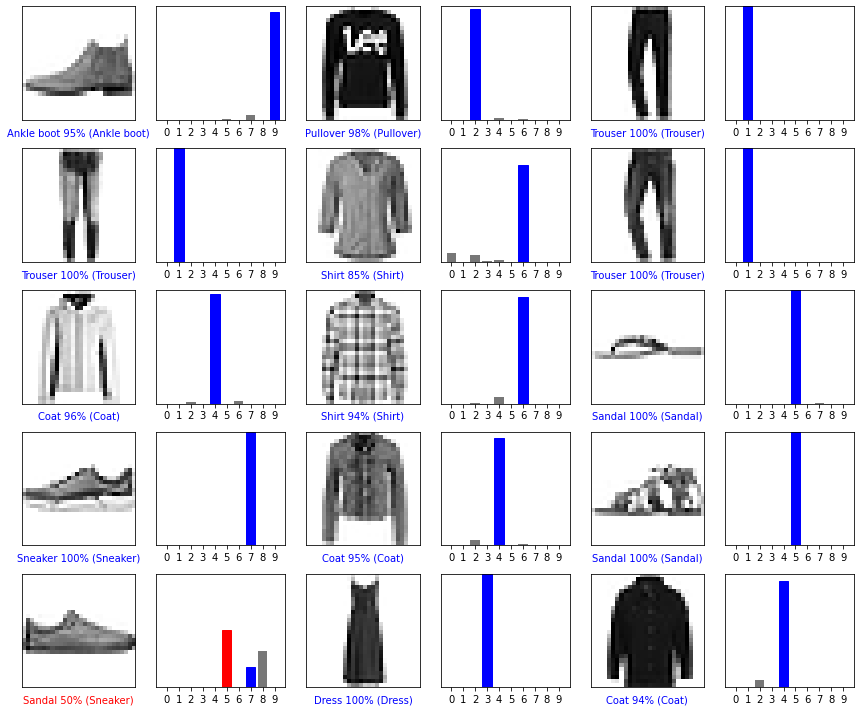

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Użycie modelu

In [29]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Pojedyńczy obrazek ma wielkość (28, 28). Pamiętamy, że do naszego modelu przekazywaliśmy batch, skłądający się ze 100 obraków, które były zebrane w jeden zbiór, trójwymiarową tablicę NumPy, czyli tensor, o wymiarzy (100, 28, 28). Stąd robiąć predykcję dla jednego obrazka chcemy zachować ten sam wymiar (shape). W związku z tym musimy dodać dodatkowy wymiar. 

In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


Teraz możemy wykonać predykcję:

In [31]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 10ms/step
[[1.9215753e-05 2.0502717e-09 9.7975266e-01 8.2563094e-09 1.3731107e-02
  1.2053560e-14 6.4970241e-03 2.0584900e-15 1.2006284e-08 4.8750018e-16]]


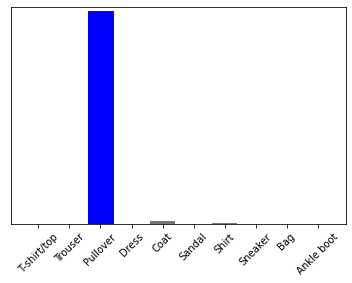

In [32]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [33]:
np.argmax(predictions_single[0])

2

Model przewidział produkt poprawnie.